In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt

import jax
import jax.numpy as jnp

from evosax.problems.low_d_optimisation import (batch_rosenbrock,
                                                batch_himmelblau,
                                                batch_hump_camel)
from evosax.utils import init_logger, update_logger

# Demo: Ask-Evaluate-Tell API
## 2D Rosenbrock Function

In [2]:
from evosax.strategies.gaussian import init_strategy, ask, tell

In [3]:
rng = jax.random.PRNGKey(0)
mean_init, sigma_init = jnp.zeros(2), 1.0
pop_size, elite_size = 6, 3
params, memory = init_strategy(mean_init, sigma_init,
                               pop_size, elite_size)

# Fix population size, fix elite size
rng, rng_input = jax.random.split(rng)
x, memory = ask(rng_input, memory, params)
value = batch_rosenbrock(x, 1, 100)
memory = tell(x, value, elite_size, params, memory)
memory["mean"]

DeviceArray([-0.13642143,  0.18655843], dtype=float32)

### Run full Rosenbrock Example with JIT

In [4]:
a, b = 1, 100
num_params = 2
pop_size, elite_size = 10, 5
mean_init, sigma_init = jnp.zeros(num_params), 1
params, memory = init_strategy(mean_init, sigma_init, pop_size, elite_size)

top_k = 3

evo_logger = init_logger(top_k, num_params)

for generation in range(200):
    # Ask - Eval - Tell - Log
    rng, rng_input = jax.random.split(rng)
    x, memory = ask(rng_input, memory, params)
    value = batch_rosenbrock(x, a, b)
    memory = tell(x, value, elite_size, params, memory)
    evo_logger = update_logger(evo_logger, x, value, memory, top_k)
    if (generation + 1) % 20 == 0:
        print("# Gen: {}|Fitness: {:.2f}|Params: {}".format(generation+1,
                                                  evo_logger["top_values"][0],
                                                  evo_logger["top_params"][0]))

# Gen: 20|Fitness: 0.44|Params: [0.3551187  0.11137407]
# Gen: 40|Fitness: 0.44|Params: [0.3551187  0.11137407]
# Gen: 60|Fitness: 0.43|Params: [0.34923914 0.11388199]
# Gen: 80|Fitness: 0.36|Params: [0.40098324 0.16471687]
# Gen: 100|Fitness: 0.36|Params: [0.40098324 0.16471687]
# Gen: 120|Fitness: 0.36|Params: [0.40098324 0.16471687]
# Gen: 140|Fitness: 0.35|Params: [0.40490937 0.16161555]
# Gen: 160|Fitness: 0.32|Params: [0.43937033 0.18410683]
# Gen: 180|Fitness: 0.30|Params: [0.44871706 0.20019393]
# Gen: 200|Fitness: 0.29|Params: [0.45976156 0.20919243]


## Schematic Plot of Contour Distribution Updates for CMA-ES

In [5]:
from evosax.strategies.cma_es import init_strategy, ask, tell
from evosax.visualize.animate_toy import himmelblau_contour

NameError: name 'init_cma_es' is not defined

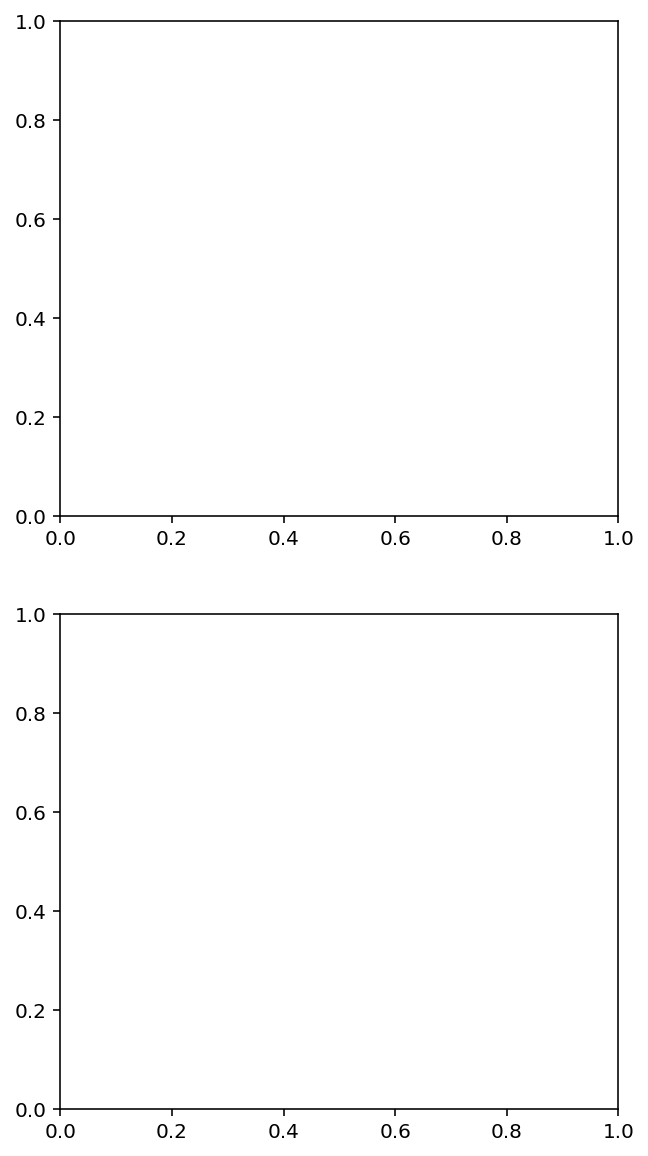

In [10]:
from matplotlib.colors import LinearSegmentedColormap
from pylab import rcParams
from scipy import stats


objective = batch_himmelblau
contour_function = himmelblau_contour
global_minimums = [(3.0, 2.0),
                   (-2.805118, 3.131312),
                   (-3.779310, -3.283186),
                   (3.584428, -1.848126),]
x1_lower_bound, x1_upper_bound = -4, 4
x2_lower_bound, x2_upper_bound = -4, 4


def himmelblau_contour(x):
    return np.log(himmelblau_fct(x) + 1)

def himmelblau_fct(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

In [ ]:
rng = jax.random.PRNGKey(1)

sigma = (x1_upper_bound - x2_lower_bound) / 5
es_params, es_memory = init_strategy(jnp.zeros(2), sigma,
                                     population_size=4, mu=2)
evo_logger = init_logger(4, 2)

In [ ]:
def gen_base_plot():
    rcParams["figure.figsize"] = 5, 5
    fig1, ax1 = plt.subplots(1, 1)
    fig2, ax2 = plt.subplots(1, 1)

    color_dict = {
        "red": ((0.0, 0.0, 0.0), (1.0, 1.0, 1.0)),
        "green": ((0.0, 0.0, 0.0), (1.0, 1.0, 1.0)),
        "blue": ((0.0, 1.0, 1.0), (1.0, 1.0, 1.0)),
        "yellow": ((1.0, 1.0, 1.0), (1.0, 1.0, 1.0)),
    }
    bw = LinearSegmentedColormap("BlueWhile", color_dict)


    ax1.set_xlim(x1_lower_bound, x1_upper_bound)
    ax1.set_ylim(x2_lower_bound, x2_upper_bound)
    ax2.set_xlim(x1_lower_bound, x1_upper_bound)
    ax2.set_ylim(x2_lower_bound, x2_upper_bound)
    ax1.axis("off")
    ax2.axis("off")

    # Plot 4 local minimum value
    for m in global_minimums:
        ax1.plot(m[0], m[1], "y*", ms=10)
        ax2.plot(m[0], m[1], "y*", ms=10)

    # Plot contour of himmelbleu function
    x1 = np.arange(x1_lower_bound, x1_upper_bound, 0.01)
    x2 = np.arange(x2_lower_bound, x2_upper_bound, 0.01)
    x1, x2 = np.meshgrid(x1, x2)
    x = np.stack([x1, x2])
    ax1.contour(x1, x2, contour_function(x), 30, cmap=bw)
    fig1.tight_layout()
    fig2.tight_layout()
    return fig1, ax1, fig2, ax2

In [ ]:
fig1, ax1, fig2, ax2 = gen_base_plot()

rng, rng_input = jax.random.split(rng)
x, es_memory = ask(rng_input, es_memory, es_params)

for i in range(4):
    # Plot sample points
    ax1.plot(x[i, 0], x[i, 1], "o", c="r", alpha=0.5)
    ax2.plot(x[i, 0], x[i, 1], "o", c="r", alpha=0.5)

# Plot multivariate gaussian distribution of CMA-ES
xt, yt = np.mgrid[x1_lower_bound:x1_upper_bound:0.01,
                x2_lower_bound:x2_upper_bound:0.01]
rv = stats.multivariate_normal(np.array(es_memory["mean"]),
                               np.array(es_memory["C"]))
pos = np.dstack((xt, yt))
ax2.contourf(xt, yt, rv.pdf(pos), cmap="Reds")

In [ ]:
fig1, ax1, fig2, ax2 = gen_base_plot()

# Plot multivariate gaussian distribution of CMA-ES
xt, yt = np.mgrid[x1_lower_bound:x1_upper_bound:0.01,
                x2_lower_bound:x2_upper_bound:0.01]
rv1 = stats.multivariate_normal(np.array(np.zeros(2)),
                               np.array(np.eye(2)))
pos = np.dstack((xt, yt))
c1 = ax2.contour(xt, yt, rv1.pdf(pos), cmap="Reds", alpha=0.5)

value = objective(x, 0)
es_memory = tell(x, value, 2, es_params, es_memory)

# Plot multivariate gaussian distribution of CMA-ES
x, y = np.mgrid[x1_lower_bound:x1_upper_bound:0.01,
                x2_lower_bound:x2_upper_bound:0.01]
rv2 = stats.multivariate_normal(np.array(es_memory["mean"]),
                               np.array(es_memory["C"]))
pos = np.dstack((x, y))
c2 = ax2.contourf(x, y, rv2.pdf(pos), cmap="Reds")